In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
pwd

'C:\\Users\\s27ds\\desktop'

In [77]:
cd desktop

[WinError 2] The system cannot find the file specified: 'desktop'
C:\Users\s27ds\desktop


In [78]:
df = pd.read_csv('C:/Users/s27ds/desktop/train.csv')

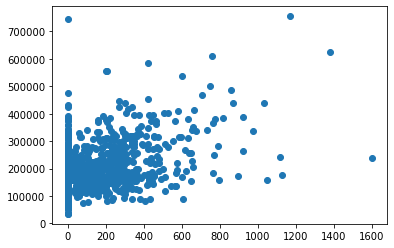

In [79]:
plt.scatter(df['MasVnrArea'],df['SalePrice'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
x = df[['GrLivArea']] 
y = df.SalePrice

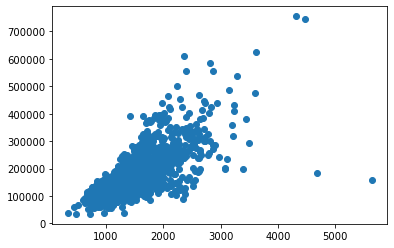

In [82]:
plt.scatter(x,y)

In [83]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:
xmean = x.mean()
ymean = y.mean()

In [85]:
# this is (xmean - every x in the list)
df['diffx'] = xmean - x

In [86]:
#this is (xmean - every x in the list)squareed
df['diffx_squared'] = df.diffx**2

In [87]:
SSxx = df.diffx_squared.sum()

In [88]:
df['diffy'] = ymean - y

In [89]:
SSxy = (df.diffx * df.diffy).sum()

In [90]:
m = SSxy/SSxx

In [91]:
m

107.13035896582517

In [92]:
b = ymean - m * xmean

In [93]:
b

GrLivArea    18569.025856
dtype: float64

In [94]:
#value = x
def predict(value):
    predict = m*value+b
    return predict

In [95]:
# so a GrLivArea of 5000 would likly cost around $554220.82 dollars 
predict(5000)

GrLivArea    554220.820686
dtype: float64

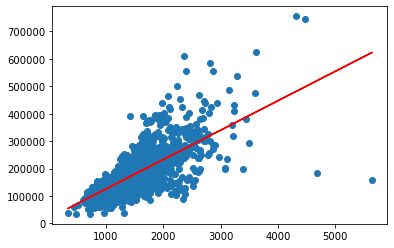

In [96]:
#now we can plot the regrssion line 
plt.scatter(x,y)
plt.plot(x,m*x+b, 'r')

In [97]:
# now that i did it my hand lets cheak with sklearn to see if we are right?
### m = 107.13035896582517, b = 18569.02585648728
# for the IV you need to do this x = df[['GrLivArea']] instead of x = df.GrLivArea
from sklearn import linear_model

In [98]:
model = linear_model.LinearRegression()

In [99]:
model.fit(x,y)

LinearRegression()

In [100]:
model.coef_

array([107.13035897])

In [101]:
model.intercept_

18569.02585648728

In [102]:
# sklearn is faster adn jsut as accurate 
model.predict([[5000]])

C:\Users\s27ds\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([554220.82068561])

In [103]:
# this is r2 coeoficcient of determination 
model.score(x,y)

0.5021486502718042